In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
from sklearn.datasets import load_wine
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Set random seed for reproducibility
np.random.seed(42)

In [3]:
# 1. Load and explore the wine dataset
print("Step 1: Loading and exploring the dataset")
wine = load_wine()
X = wine.data
y = wine.target
feature_names = wine.feature_names
target_names = wine.target_names

Step 1: Loading and exploring the dataset


In [4]:
# Data info
print(f"Dataset shape: {X.shape}")
print(f"Number of classes: {len(np.unique(y))}")
print(f"Class labels: {target_names}")
print(f"Features: {feature_names}")

Dataset shape: (178, 13)
Number of classes: 3
Class labels: ['class_0' 'class_1' 'class_2']
Features: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


In [5]:
# Create a pandas DataFrame for easier data exploration
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y
df['target_name'] = [target_names[i] for i in y]

In [6]:
# Display basic statistics
print("\nBasic statistics:")
df.describe().T


Basic statistics:


,count,mean,std,min,25%,50%,75%,max
alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
malic_acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
alcalinity_of_ash,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
total_phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
nonflavanoid_phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58
color_intensity,178.0,5.058090,2.318286,1.28,3.2200,4.690,6.2000,13.00


In [7]:
# Check for missing values
print("\nMissing values:")
df.isnull().sum()


Missing values:


alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
target_name                     0
dtype: int64

In [8]:
# Show class distribution
print("\nClass distribution:")
df['target_name'].value_counts()


Class distribution:


target_name
class_1    71
class_0    59
class_2    48
Name: count, dtype: int64

In [9]:
# 2. Split the data into training and test sets
print("\nStep 2: Splitting the data into training and test sets")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")


Step 2: Splitting the data into training and test sets
Training set shape: (124, 13)
Test set shape: (54, 13)


In [10]:
# 3. Data preprocessing: Standardize the features
print("\nStep 3: Standardizing the features")
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)


Step 3: Standardizing the features


In [11]:
# 4. Implement PCA
print("\nStep 4: Implementing PCA")
# Create PCA object
pca = PCA()
X_train_pca = pca.fit_transform(X_train_std)


Step 4: Implementing PCA


In [12]:
# Explained variance
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

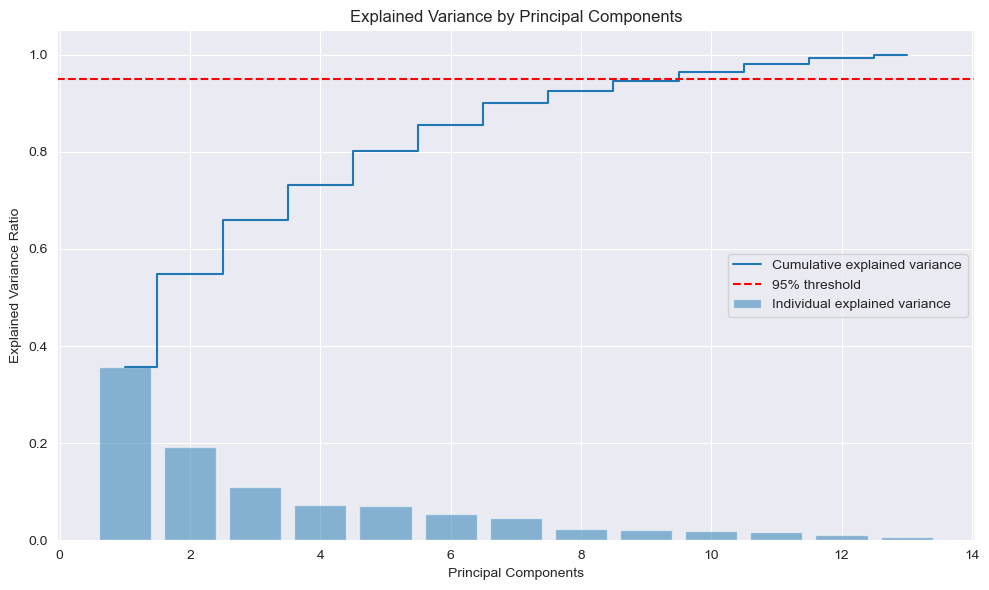

In [13]:
# Plot the explained variance
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.5, align='center',
        label='Individual explained variance')
plt.step(range(1, len(cumulative_variance) + 1), cumulative_variance, where='mid',
         label='Cumulative explained variance')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% threshold')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by Principal Components')
plt.legend()
plt.tight_layout()
plt.show()

In [14]:
# Find the number of components that explain 95% of the variance
n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Number of components explaining 95% of the variance: {n_components_95}")

Number of components explaining 95% of the variance: 10


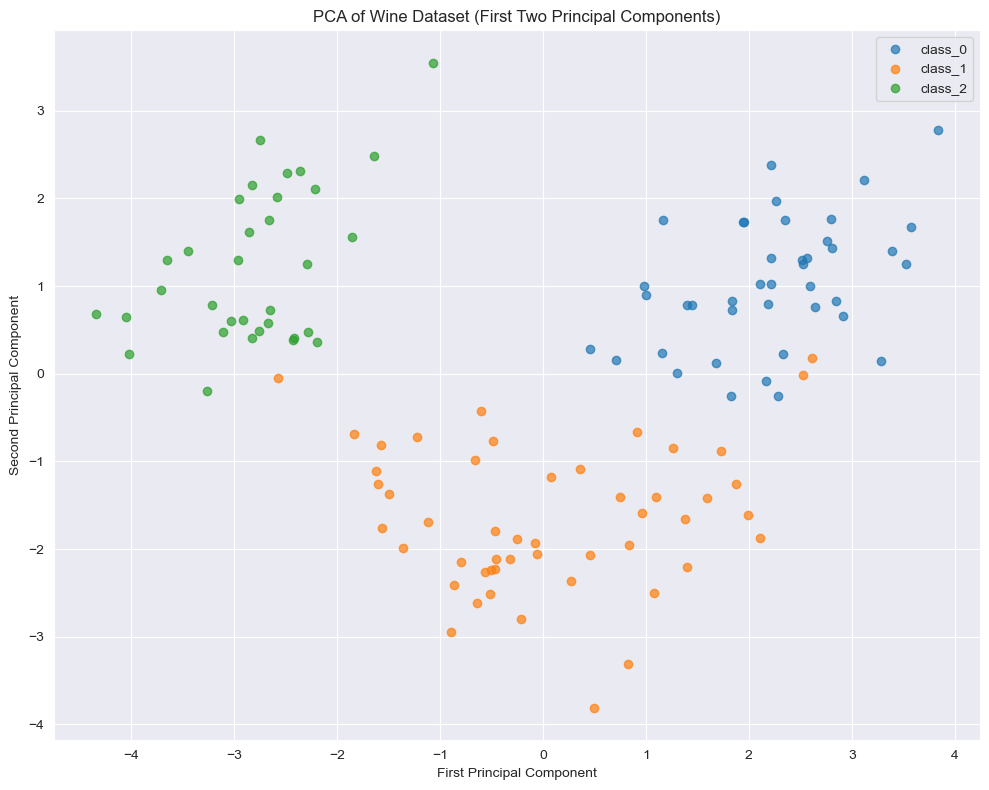

In [16]:
# Visualize the first two principal components
pca_2d = PCA(n_components=2)
X_train_pca_2d = pca_2d.fit_transform(X_train_std)
X_test_pca_2d = pca_2d.transform(X_test_std)

plt.figure(figsize=(10, 8))
for i, target_name in enumerate(target_names):
    plt.scatter(X_train_pca_2d[y_train == i, 0], X_train_pca_2d[y_train == i, 1],
                label=target_name, alpha=0.7)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA of Wine Dataset (First Two Principal Components)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

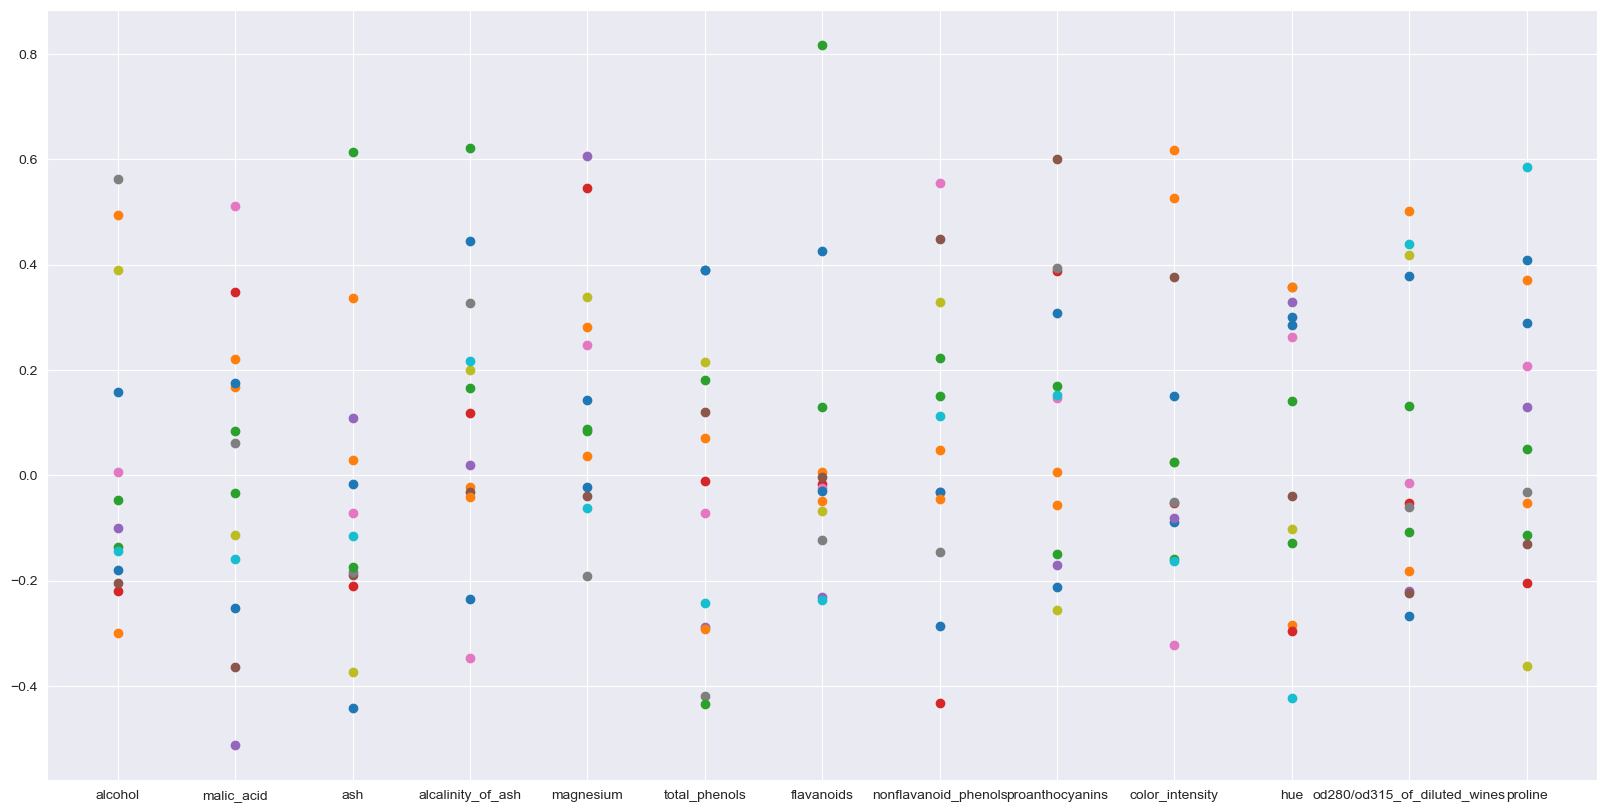

In [26]:
# Plot the loading vectors
plt.figure(figsize=(20, 10))
components = pca.components_
feature_names = wine.feature_names
loading_vectors = pd.DataFrame(components.T, columns=[f'PC{i+1}' for i in range(components.shape[0])], index=feature_names)
plt.plot(loading_vectors, marker='o', linestyle='None')
plt.show()

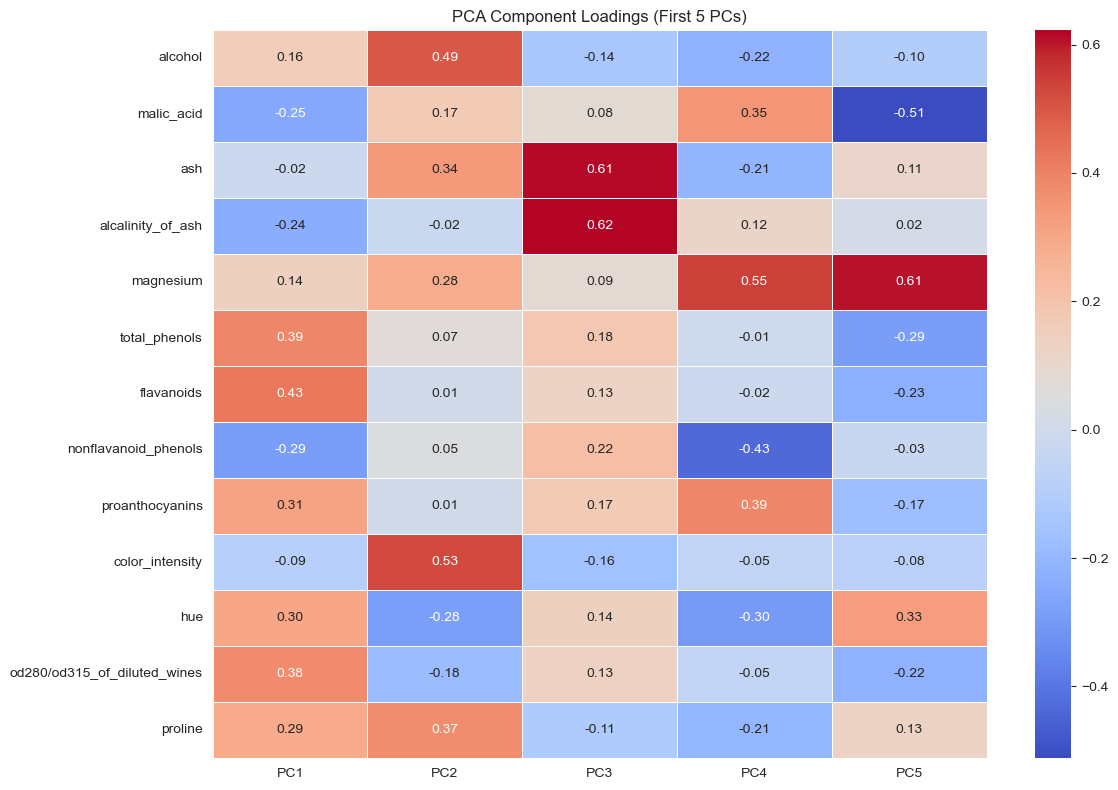

In [24]:
# Plot heatmap of component loadings
plt.figure(figsize=(12, 8))
sns.heatmap(loading_vectors.iloc[:, :5], annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('PCA Component Loadings (First 5 PCs)')
plt.tight_layout()
plt.show()

In [28]:
# Apply PCA with the optimal number of components
pca_optimal = PCA(n_components=n_components_95)
X_train_pca_optimal = pca_optimal.fit_transform(X_train_std)
X_test_pca_optimal = pca_optimal.transform(X_test_std)

print(f"Optimal PCA transformation shape: {X_train_pca_optimal.shape}")

Optimal PCA transformation shape: (124, 10)


In [30]:
# 5. Implement LDA
print("\nStep 5: Implementing LDA")
# The number of components in LDA is at most min(n_features, n_classes - 1)
n_components_lda = min(X_train.shape[1], len(np.unique(y_train)) - 1)
print(f"Maximum number of LDA components: {n_components_lda}")

lda = LDA(n_components=n_components_lda)
X_train_lda = lda.fit_transform(X_train_std, y_train)
X_test_lda = lda.transform(X_test_std)

print(f"LDA transformation shape: {X_train_lda.shape}")


Step 5: Implementing LDA
Maximum number of LDA components: 2
LDA transformation shape: (124, 2)


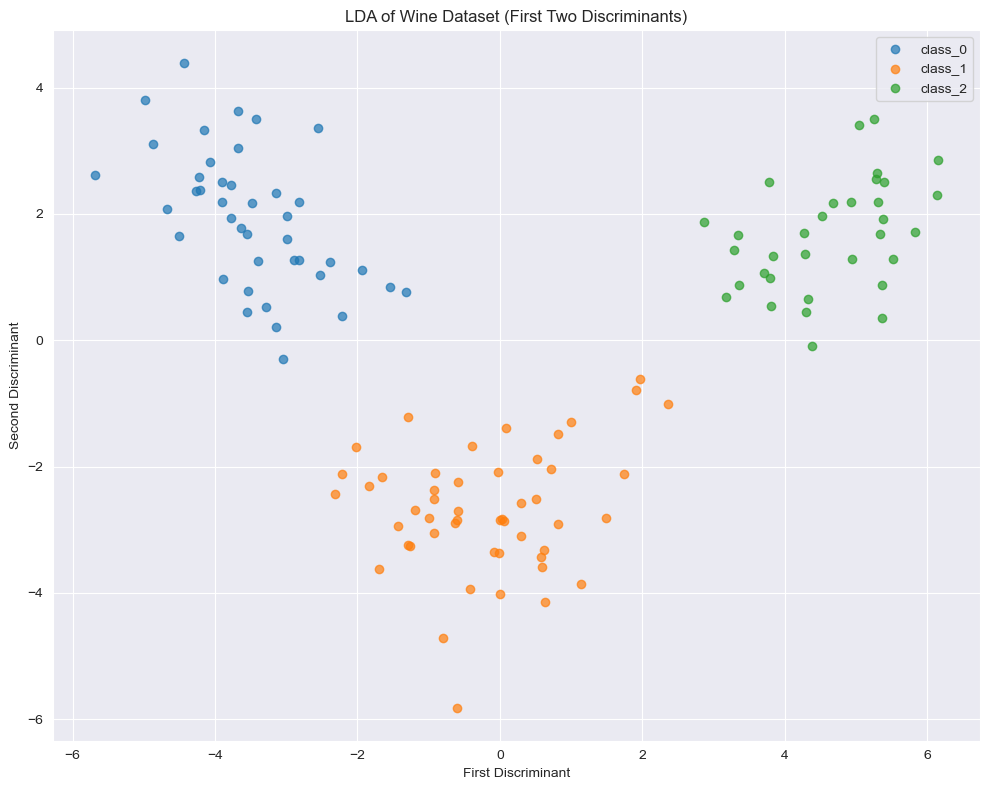

In [31]:
# Visualize the LDA components
plt.figure(figsize=(10, 8))
for i, target_name in enumerate(target_names):
    plt.scatter(X_train_lda[y_train == i, 0], X_train_lda[y_train == i, 1],
                label=target_name, alpha=0.7)
plt.xlabel('First Discriminant')
plt.ylabel('Second Discriminant')
plt.title('LDA of Wine Dataset (First Two Discriminants)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [32]:
# 6. Model evaluation with KNN classifier
print("\nStep 6: Model evaluation with KNN classifier")

# Define a function to evaluate the model
def evaluate_model(X_train, X_test, y_train, y_test, model_name):
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    print(f"\n{model_name} Model Evaluation:")
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred, target_names=target_names))

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=target_names, yticklabels=target_names)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()
    plt.show()

    return accuracy


Step 6: Model evaluation with KNN classifier



Original Data Model Evaluation:
Accuracy: 0.9444
Classification Report:
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        18
     class_1       1.00      0.86      0.92        21
     class_2       0.83      1.00      0.91        15

    accuracy                           0.94        54
   macro avg       0.94      0.95      0.94        54
weighted avg       0.95      0.94      0.94        54



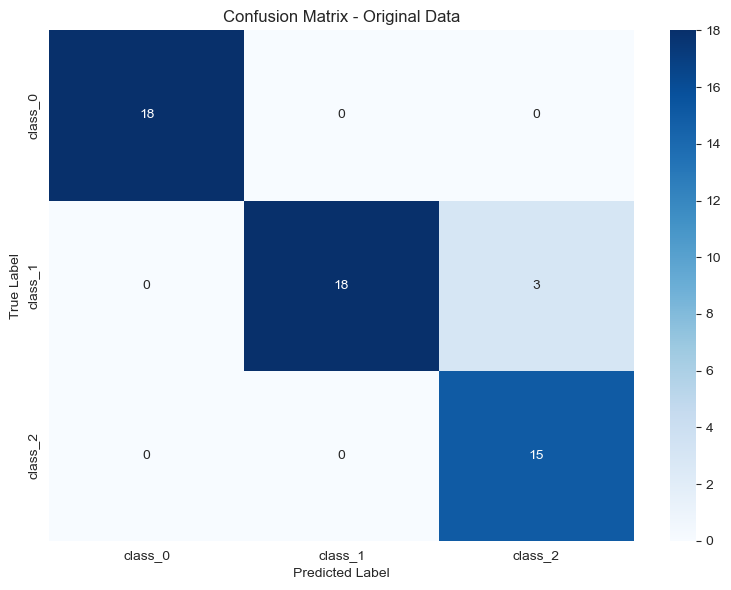

In [34]:
# Evaluate original data
accuracy_original = evaluate_model(X_train_std, X_test_std, y_train, y_test, "Original Data")


PCA Model Evaluation:
Accuracy: 0.9444
Classification Report:
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        18
     class_1       1.00      0.86      0.92        21
     class_2       0.83      1.00      0.91        15

    accuracy                           0.94        54
   macro avg       0.94      0.95      0.94        54
weighted avg       0.95      0.94      0.94        54



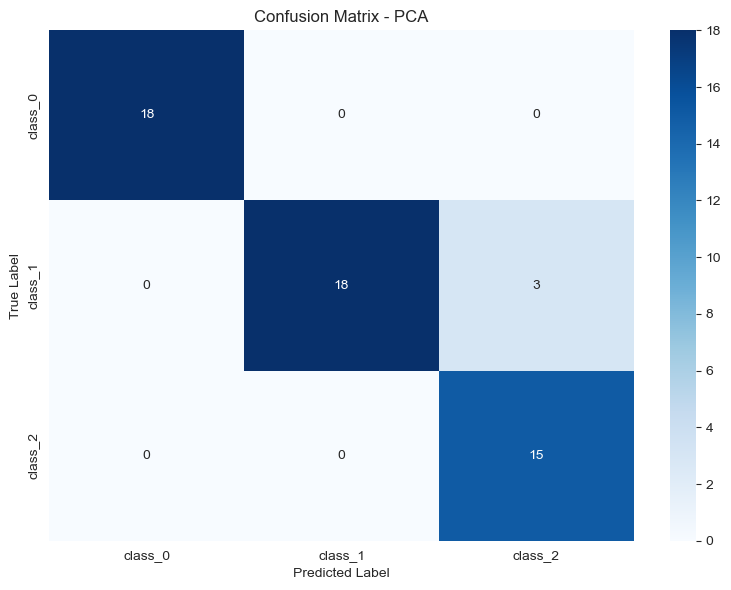

In [35]:
# Evaluate PCA-transformed data
accuracy_pca = evaluate_model(X_train_pca_optimal, X_test_pca_optimal, y_train, y_test, "PCA")


LDA Model Evaluation:
Accuracy: 0.9630
Classification Report:
              precision    recall  f1-score   support

     class_0       0.95      1.00      0.97        18
     class_1       0.95      0.95      0.95        21
     class_2       1.00      0.93      0.97        15

    accuracy                           0.96        54
   macro avg       0.97      0.96      0.96        54
weighted avg       0.96      0.96      0.96        54



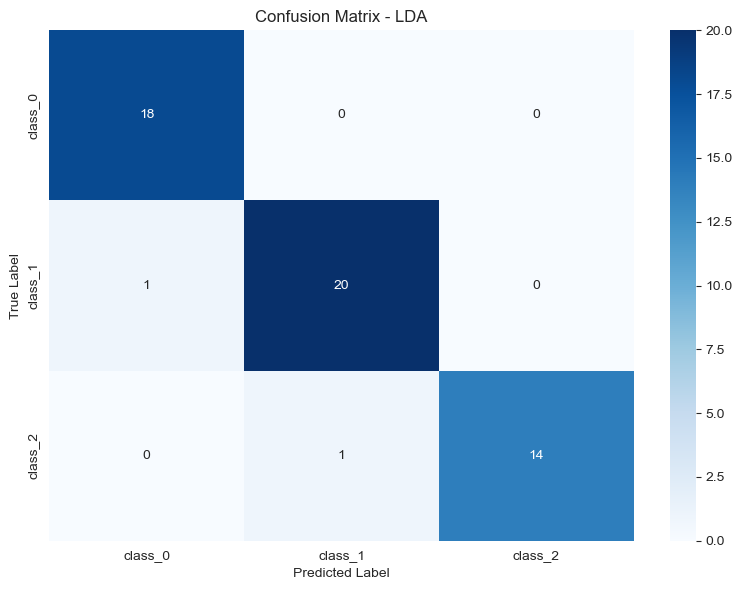

In [36]:
# Evaluate LDA-transformed data
accuracy_lda = evaluate_model(X_train_lda, X_test_lda, y_train, y_test, "LDA")

In [37]:
# 7. Compare the results
print("\nStep 7: Comparing the results")
results = pd.DataFrame({
    'Model': ['Original Data', 'PCA', 'LDA'],
    'Accuracy': [accuracy_original, accuracy_pca, accuracy_lda],
    'Dimensionality': [X_train_std.shape[1], X_train_pca_optimal.shape[1], X_train_lda.shape[1]]
})
print(results)


Step 7: Comparing the results
           Model  Accuracy  Dimensionality
0  Original Data  0.944444              13
1            PCA  0.944444              10
2            LDA  0.962963               2


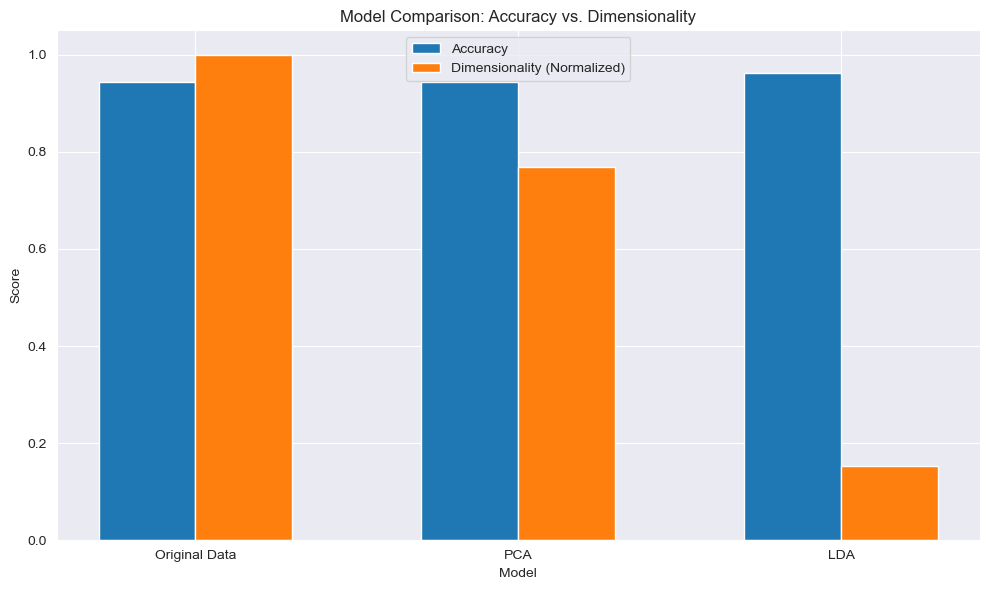

In [38]:
# 8. Visualize the comparison
plt.figure(figsize=(10, 6))
bar_width = 0.3
index = np.arange(3)

plt.bar(index, results['Accuracy'], bar_width, label='Accuracy')
plt.bar(index + bar_width, results['Dimensionality'] / 13, bar_width, label='Dimensionality (Normalized)')

plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Model Comparison: Accuracy vs. Dimensionality')
plt.xticks(index + bar_width / 2, results['Model'])
plt.legend()
plt.tight_layout()
plt.show()


Step 9: Combining PCA and LDA

PCA+LDA Model Evaluation:
Accuracy: 0.9815
Classification Report:
              precision    recall  f1-score   support

     class_0       0.95      1.00      0.97        18
     class_1       1.00      0.95      0.98        21
     class_2       1.00      1.00      1.00        15

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



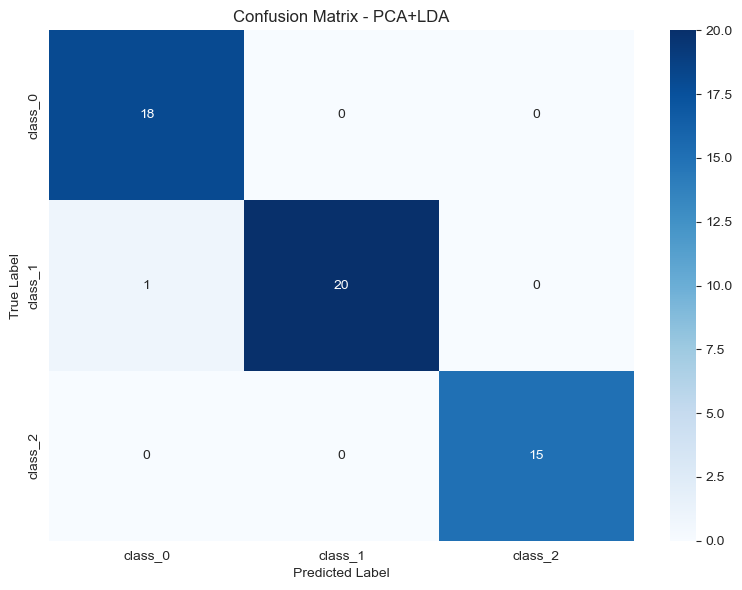

In [40]:
# 9. Bonus: Combining PCA and LDA
print("\nStep 9: Combining PCA and LDA")

# First apply PCA for dimensionality reduction
pca_for_lda = PCA(n_components=0.95)  # Preserve 95% of variance
X_train_pca_for_lda = pca_for_lda.fit_transform(X_train_std)
X_test_pca_for_lda = pca_for_lda.transform(X_test_std)

# Then apply LDA for classification
lda_after_pca = LDA(n_components=n_components_lda)
X_train_pca_lda = lda_after_pca.fit_transform(X_train_pca_for_lda, y_train)
X_test_pca_lda = lda_after_pca.transform(X_test_pca_for_lda)

# Evaluate the combined approach
accuracy_pca_lda = evaluate_model(X_train_pca_lda, X_test_pca_lda, y_train, y_test, "PCA+LDA")

In [41]:
# Update the results
results = pd.concat([results, pd.DataFrame({
    'Model': ['PCA+LDA'],
    'Accuracy': [accuracy_pca_lda],
    'Dimensionality': [X_train_pca_lda.shape[1]]
})], ignore_index=True)

print("\nFinal comparison:")
print(results)


Final comparison:
           Model  Accuracy  Dimensionality
0  Original Data  0.944444              13
1            PCA  0.944444              10
2            LDA  0.962963               2
3        PCA+LDA  0.981481               2


In [42]:
# 10. Summary and conclusions
print("\nStep 10: Summary and conclusions")
print("1. Original data has high dimensionality (13 features) but can achieve good accuracy.")
print(f"2. PCA reduced dimensionality to {X_train_pca_optimal.shape[1]} components while preserving 95% of variance.")
print(f"3. LDA reduced dimensionality to {X_train_lda.shape[1]} components while focusing on class separability.")
print("4. The combined PCA+LDA approach leverages both variance preservation and class separation.")
print("\nBest performing model based on accuracy:", results.loc[results['Accuracy'].idxmax(), 'Model'])
print("Most efficient model (considering dimensionality reduction):",
      results.loc[results['Accuracy'].idxmax() if np.allclose(results['Accuracy'], results['Accuracy'].max(), rtol=0.01)
                 else results['Accuracy'].idxmax(), 'Model'])


Step 10: Summary and conclusions
1. Original data has high dimensionality (13 features) but can achieve good accuracy.
2. PCA reduced dimensionality to 10 components while preserving 95% of variance.
3. LDA reduced dimensionality to 2 components while focusing on class separability.
4. The combined PCA+LDA approach leverages both variance preservation and class separation.

Best performing model based on accuracy: PCA+LDA
Most efficient model (considering dimensionality reduction): PCA+LDA
